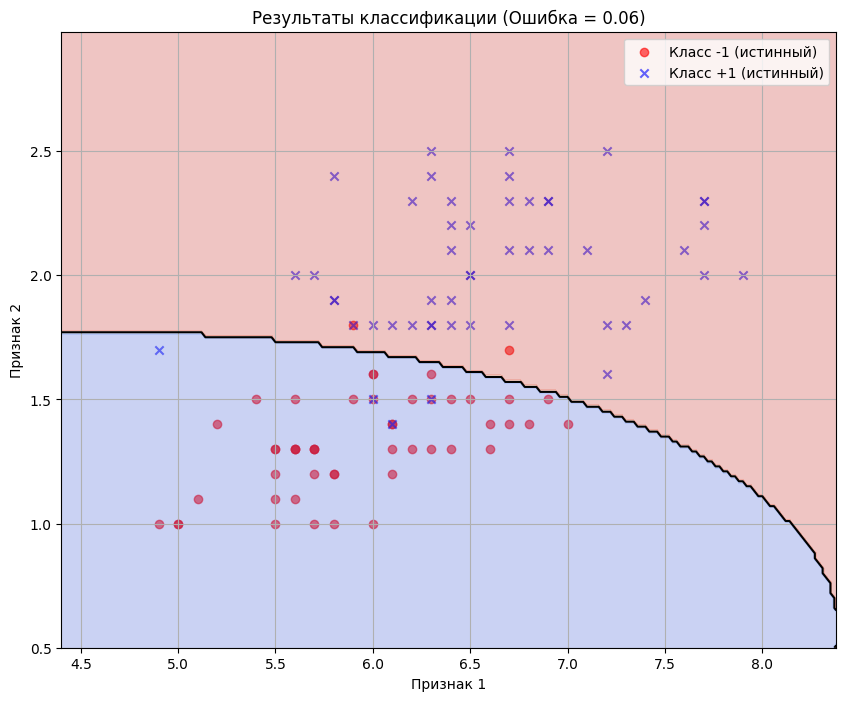

Доля ошибок (Q): 0.0600


In [2]:
import numpy as np

data_x = [(7.2, 2.5), (6.4, 2.2), (6.3, 1.5), (7.7, 2.2), (6.2, 1.8), (5.7, 1.3), (7.1, 2.1), (5.8, 2.4), (5.2, 1.4), (5.9, 1.5), (7.0, 1.4), (6.8, 2.1), (7.2, 1.6), (6.7, 2.4), (6.0, 1.5), (5.1, 1.1), (6.6, 1.3), (6.1, 1.4), (6.7, 2.1), (6.4, 1.8), (5.6, 1.3), (6.9, 2.3), (6.4, 1.9), (6.9, 2.3), (6.5, 2.2), (6.0, 1.5), (5.6, 1.1), (5.6, 1.5), (6.0, 1.0), (6.0, 1.8), (6.7, 2.5), (7.7, 2.3), (5.5, 1.1), (5.8, 1.0), (6.9, 2.1), (6.6, 1.4), (6.3, 1.6), (6.1, 1.4), (5.0, 1.0), (7.7, 2.0), (4.9, 1.7), (7.2, 1.8), (6.8, 1.4), (6.1, 1.2), (5.8, 1.9), (6.3, 2.5), (5.7, 2.0), (6.5, 1.8), (7.6, 2.1), (6.3, 1.5), (6.7, 1.4), (6.4, 2.3), (6.2, 2.3), (6.3, 1.9), (5.5, 1.3), (7.9, 2.0), (6.7, 1.8), (6.4, 1.3), (6.5, 2.0), (6.5, 1.5), (6.9, 1.5), (5.6, 1.3), (5.8, 1.2), (6.7, 2.3), (6.0, 1.6), (5.7, 1.2), (5.7, 1.0), (5.5, 1.0), (6.1, 1.4), (6.3, 1.8), (5.7, 1.3), (6.1, 1.3), (5.5, 1.3), (6.3, 1.3), (5.9, 1.8), (7.7, 2.3), (6.5, 2.0), (5.6, 2.0), (6.7, 1.7), (5.7, 1.3), (5.5, 1.2), (5.0, 1.0), (5.8, 1.9), (6.2, 1.3), (6.2, 1.5), (6.3, 2.4), (6.4, 1.5), (7.4, 1.9), (6.8, 2.3), (5.6, 1.3), (5.8, 1.2), (7.3, 1.8), (6.7, 1.5), (6.3, 1.8), (6.0, 1.6), (6.4, 2.1), (6.1, 1.8), (5.9, 1.8), (5.4, 1.5), (4.9, 1.0)]
data_y = [1, 1, 1, 1, 1, -1, 1, 1, -1, -1, -1, 1, 1, 1, -1, -1, -1, 1, 1, 1, -1, 1, 1, 1, 1, 1, -1, -1, -1, 1, 1, 1, -1, -1, 1, -1, -1, -1, -1, 1, 1, 1, -1, -1, 1, 1, 1, 1, 1, -1, -1, 1, 1, 1, -1, 1, 1, -1, 1, -1, -1, -1, -1, 1, -1, -1, -1, -1, -1, 1, -1, -1, -1, -1, 1, 1, 1, 1, -1, -1, -1, -1, 1, -1, -1, 1, -1, 1, 1, -1, -1, 1, -1, 1, -1, 1, 1, -1, -1, -1]

x_train = np.array(data_x)
y_train = np.array(data_y)

# математические ожидания
mx11, mx12 = np.mean(x_train[y_train == -1], axis=0)
mx21, mx22 = np.mean(x_train[y_train == 1], axis=0)

# дисперсии
Dx11, Dx12 = np.var(x_train[y_train == -1], axis=0)
Dx21, Dx22 = np.var(x_train[y_train == 1], axis=0)

lm1 = 1     # штраф неверной классификации 1-го класса (-1)
lm2 = 1     # штраф неверной классификации 2-го класса (+1)
P1 = 0.5    # априорная вероятность появления образов 1-го класса
P2 = 1 - P1 # априорная вероятность появления образов 2-го класса

predict = []

for x in x_train:
    p_x_1 = 1/(2 * np.pi * np.sqrt(Dx11 * Dx12)) * np.exp(-((x[0] - mx11) ** 2) / (2 * Dx11) - ((x[1] - mx12) ** 2) / (2 * Dx12))

    p_x_2 = 1/(2 * np.pi * np.sqrt(Dx21 * Dx22)) * np.exp(-((x[0] - mx21) ** 2) / (2 * Dx21) - ((x[1] - mx22) ** 2) / (2 * Dx22))

    a1 = np.log(lm1 * P1) + np.log(p_x_1)
    a2 = np.log(lm2 * P2) + np.log(p_x_2)
    
    predict.append(np.argmax([a1, a2]) * 2 - 1)
    
predict = np.array(predict)

Q = np.mean(predict != y_train)

import matplotlib.pyplot as plt

# Визуализация результатов
plt.figure(figsize=(10, 8))

# Исходные точки
plt.scatter(x_train[y_train == -1, 0], x_train[y_train == -1, 1], color='red', marker='o', label='Класс -1 (истинный)', alpha=0.6)
plt.scatter(x_train[y_train == 1, 0], x_train[y_train == 1, 1], color='blue', marker='x', label='Класс +1 (истинный)', alpha=0.6)

# Построение разделяющей поверхности (для наглядности)
# Создаем сетку точек
x_min, x_max = x_train[:, 0].min() - 0.5, x_train[:, 0].max() + 0.5
y_min, y_max = x_train[:, 1].min() - 0.5, x_train[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

# Вычисляем значения дискриминантной функции для каждой точки сетки
Z = []
for i in range(xx.shape[0]):
    row = []
    for j in range(xx.shape[1]):
        x_point = np.array([xx[i, j], yy[i, j]])

        p_x_1 = 1/(2 * np.pi * np.sqrt(Dx11 * Dx12)) * np.exp(-((x_point[0] - mx11) ** 2) / (2 * Dx11) - ((x_point[1] - mx12) ** 2) / (2 * Dx12))
        p_x_2 = 1/(2 * np.pi * np.sqrt(Dx21 * Dx22)) * np.exp(-((x_point[0] - mx21) ** 2) / (2 * Dx21) - ((x_point[1] - mx22) ** 2) / (2 * Dx22))

        a1 = np.log(lm1 * P1) + np.log(p_x_1)
        a2 = np.log(lm2 * P2) + np.log(p_x_2)
        row.append(np.argmax([a1, a2]))
    Z.append(row)

Z = np.array(Z)

# Отрисовка разделяющей поверхности
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
plt.contour(xx, yy, Z, colors='k', linestyles='-', levels=[0.5]) # Add contour line for decision boundary

plt.title(f'Результаты классификации (Ошибка = {Q:.2f})')
plt.xlabel('Признак 1')
plt.ylabel('Признак 2')
plt.legend()
plt.grid(True)
plt.show()

print(f"Доля ошибок (Q): {Q:.4f}")

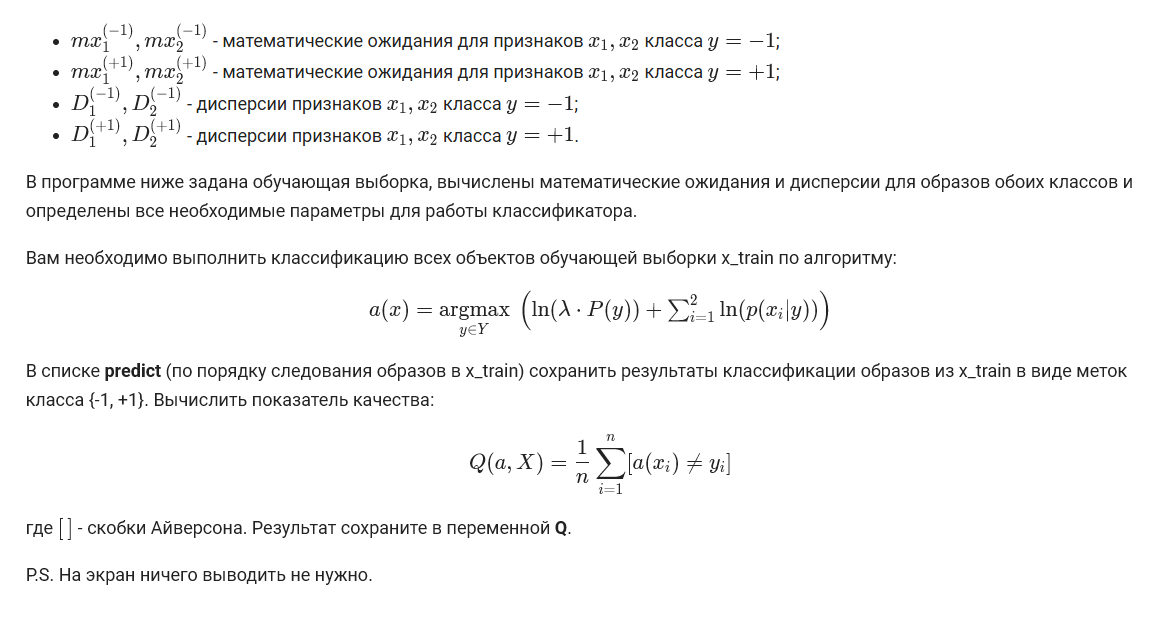